In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('SpaData.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6514 entries, 0 to 6513
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                6514 non-null   int64  
 1   TimeStamp         6514 non-null   object 
 2   Temperature       6514 non-null   float64
 3   RelativeHumidity  6514 non-null   float64
 4   Light             6514 non-null   float64
 5   OxygenLevels      6514 non-null   float64
 6   HumidityRatio     6514 non-null   float64
 7   GTOccupancy       6514 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 407.2+ KB


In [4]:
df['ID'].value_counts

<bound method IndexOpsMixin.value_counts of 0       2342
1       6419
2       3330
3       7188
4       7655
        ... 
6509    7362
6510    1591
6511    4629
6512    3657
6513    7983
Name: ID, Length: 6514, dtype: int64>

In [5]:
correlation=df.corr()
correlation['GTOccupancy'].sort_values(ascending=False)

GTOccupancy         1.000000
Light               0.910707
OxygenLevels        0.711426
Temperature         0.544737
HumidityRatio       0.293591
RelativeHumidity    0.123522
ID                 -0.111496
Name: GTOccupancy, dtype: float64

In [6]:
df.drop('ID', axis=1)
df.reset_index(drop=True)
df

,ID,TimeStamp,Temperature,RelativeHumidity,Light,OxygenLevels,HumidityRatio,GTOccupancy
0,2342,06-02-15 8:51,20.840,19.745000,433.0,629.750000,0.003000,1
1,6419,09-02-15 4:49,19.290,26.890000,0.0,466.000000,0.003716,0
2,3330,07-02-15 1:20,20.000,18.700000,0.0,435.500000,0.002696,0
3,7188,09-02-15 17:38,22.200,38.433333,429.5,1943.500000,0.006381,1
4,7655,10-02-15 1:25,20.245,32.900000,0.0,469.000000,0.004833,0
...,...,...,...,...,...,...,...,...
6509,7362,09-02-15 20:31,20.500,34.590000,0.0,868.500000,0.005164,0
6510,1591,05-02-15 20:21,21.200,19.340000,0.0,483.500000,0.003004,0
6511,4629,07-02-15 22:59,19.600,28.600000,0.0,435.000000,0.004031,0
6512,3657,07-02-15 6:47,19.760,19.230000,0.0,450.333333,0.002732,0


In [7]:
training_target_df=df.GTOccupancy[:4000]

In [8]:
testing_target_df=df.GTOccupancy[4000:]

In [9]:
testing_target_df

4000    1
4001    0
4002    1
4003    0
4004    0
       ..
6509    0
6510    0
6511    0
6512    0
6513    0
Name: GTOccupancy, Length: 2514, dtype: int64

In [10]:
training_df=df.drop(['GTOccupancy', 'ID', 'TimeStamp'], axis=1)

In [11]:
training_data_df=training_df[:4000]
testing_data_df=training_df[4000:]

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
model=LogisticRegression()

In [14]:
model.fit(training_data_df, training_target_df)

LogisticRegression()

In [15]:
test_output=model.predict(testing_data_df)

In [16]:
test_output

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [17]:
test_output,testing_target_df

(array([1, 0, 1, ..., 0, 0, 0], dtype=int64),
 4000    1
 4001    0
 4002    1
 4003    0
 4004    0
        ..
 6509    0
 6510    0
 6511    0
 6512    0
 6513    0
 Name: GTOccupancy, Length: 2514, dtype: int64)

In [18]:
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
print(classification_report(testing_target_df,test_output))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1975
           1       0.94      0.98      0.96       539

    accuracy                           0.98      2514
   macro avg       0.97      0.98      0.98      2514
weighted avg       0.98      0.98      0.98      2514



Text(69.0, 0.5, 'Truth')

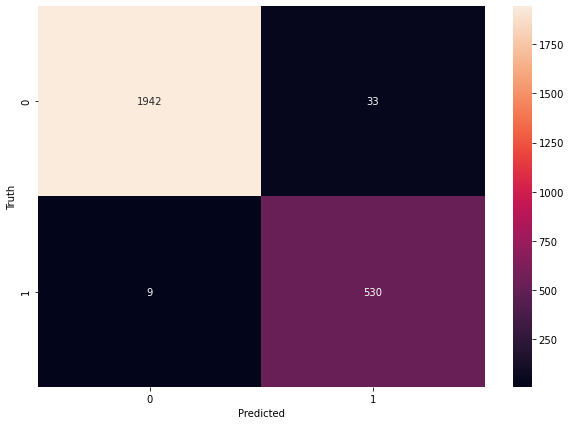

In [20]:
import tensorflow as tf
import seaborn as sn
cm = tf.math.confusion_matrix(labels=testing_target_df,predictions=test_output)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [21]:
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\tijil\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>